# ГАЗ ВАН-ДЕР-ВААЛЬСА

In [1]:
import numpy as np

Всякого рода параметры в представлении не нуждаются:

In [2]:
tau = 0.9

dP = np.empty(2)

dP[0] = 0.
dP[1] = 1.

tol0 = 0.001

diff = 1

Я умею считать такой интеграл аналитически, именно так и поступил:

In [3]:
def integral (interval):
    
    return (8/3)*tau*np.log( interval[1] - 1/3 ) + 3 / interval[1] - ( (8/3)*tau*np.log( interval[0] - 1/3 ) + 3 / interval[0] )

Матрица составит уравнению хорошую компанию:

In [4]:
def companion_matrix ( pi ):
    
    return np.array ([[0 , 0 ,1 / pi  ],[1 , 0 , - 3 / pi],[0 , 1 , (pi + 8 * tau) / ( 3 * pi )]])

Дихотомия (задача про верблюда). Ищет оптимальное давление. Всякого рода np.imag  - бубен для отпугивания комплексных корней:

In [5]:
while np.abs( diff ) > tol0 or np.imag( diff )!= 0 :
    
    pi = (dP[1] + dP[0]) / 2
    
    korni = np.linalg.eigvals ( companion_matrix (pi) )
    
    square =  (np.amax(korni) - np.amin(korni)) * pi
    
    interval = [np.amin(korni) , np.amax(korni)]
    
    diff = integral ( interval ) - square
    
    isC = np.any( np.imag( korni )!= 0 )
    
    if diff > 0 :
        
        dP[0] = pi
     
    if diff < 0 or isC :
        
        dP[1] = pi
         
        
print(pi) 

0.646484375


Магия Юпитера:

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

Не люблю такие картинки, но сделаю:

<IPython.core.display.Javascript object>


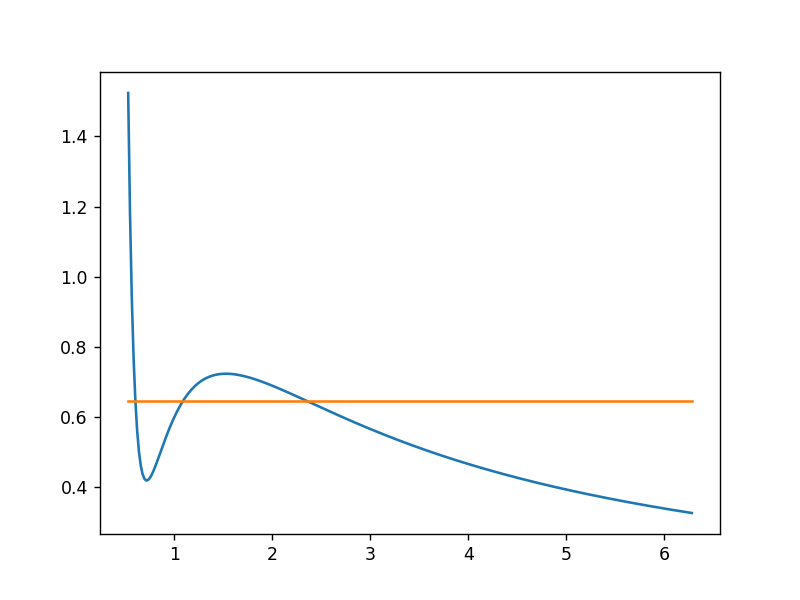

In [9]:
def pressure (phi, tau):
    
    return ( 8 / 3 ) * tau / ( phi - 1/3 ) - 3 / (phi ** 2)
    
    

xes = np.linspace ( 0.53, 2 * np.pi, 314)
yes = pressure ( xes, tau )

plt.plot (xes, yes)
plt.plot (xes, pi* np.ones_like(xes))